In [1]:
import pandas as pd
data = pd.read_csv('microbes.csv')
data.head()

,id,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30527 non-null  int64  
 1   Solidity         30527 non-null  float64
 2   Eccentricity     30527 non-null  float64
 3   EquivDiameter    30527 non-null  float64
 4   Extrema          30527 non-null  float64
 5   FilledArea       30527 non-null  float64
 6   Extent           30527 non-null  float64
 7   Orientation      30527 non-null  float64
 8   EulerNumber      30527 non-null  float64
 9   BoundingBox1     30527 non-null  float64
 10  BoundingBox2     30527 non-null  float64
 11  BoundingBox3     30527 non-null  float64
 12  BoundingBox4     30527 non-null  float64
 13  ConvexHull1      30527 non-null  float64
 14  ConvexHull2      30527 non-null  float64
 15  ConvexHull3      30527 non-null  float64
 16  ConvexHull4      30527 non-null  float64
 17  MajorAxisLen

In [3]:
data.drop(['id'], axis=1, inplace=True)

In [4]:
print(data.head())

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   
3     10.10          17.9           7.29    11.10       1.470    6.30   
4      6.27          20.2          20.10    10.70      14.700    3.97   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97         10.90  ...         2.97   
1        18.60         22.5          5.41         19.20  ...         5.47   
2        21.00         22.4          5.96         10.20  ...         5.96   
3         9.94         21.9          8.81         10.70  ...         8.88   
4         2.58         11.9         10.20          1.22  ...        10.20   

   MajorAxisLength  MinorAxisLength  Perimeter  ConvexArea  Centroid1  \
0             1.34       

In [5]:
data = data.sample(frac=1)
print(data.head())

       Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
13262      8.86          22.4           1.89     3.39      0.0702    3.50   
29359      4.03          22.5           3.36    17.50      0.2000    1.70   
16878      8.48          18.5           1.27    21.70      0.0304    6.08   
3179       5.07          22.8           5.21     6.79      0.4870    1.68   
16526      8.56          21.0           1.48    16.70      0.0404    5.48   

       Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
13262        19.50         22.8          2.71         16.40  ...         2.71   
29359        14.40         22.6         14.70          8.49  ...        14.70   
16878        17.10         23.0         21.50          9.07  ...        21.50   
3179         19.70         22.1          3.98          6.93  ...         5.31   
16526         6.42         22.9         16.70          9.63  ...        16.70   

       MajorAxisLength  MinorAxisLength  Perimeter

In [6]:
val_data = data.sample(frac=0.2)
print(len(val_data))
data.drop(val_data.index, inplace=True)
len(data)

6105


24422

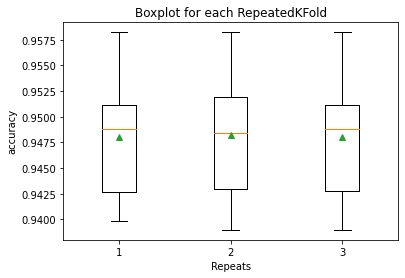

In [7]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import numpy as np

model = KNeighborsClassifier(3)

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModel(X, y):
    repeats = range(1,4)
    results = []
    for r in repeats:
        scores = evaluate_model(X, y, r)
        results.append(scores)
    plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
    plt.title('Boxplot for each RepeatedKFold')
    plt.xlabel('Repeats')
    plt.ylabel('accuracy')
    plt.show()

x = data.drop(['microorganisms'], axis=1).values
y = data[['microorganisms']].values
callModel(x, y)

In [10]:
data.drop_duplicates(inplace=True, keep='first')
val_data.drop_duplicates(inplace=True, keep='first')
len(data)

4820

In [11]:
# Removing highly correlated features having correlation > 0.90
import numpy as np

cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
data = data.drop(to_drop, axis=1)
val_data = val_data.drop(to_drop, axis=1)
data.info()

/tmp/ipykernel_11002/5003252.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4820 entries, 13262 to 15834
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         4820 non-null   float64
 1   Eccentricity     4820 non-null   float64
 2   EquivDiameter    4820 non-null   float64
 3   Extrema          4820 non-null   float64
 4   FilledArea       4820 non-null   float64
 5   Orientation      4820 non-null   float64
 6   EulerNumber      4820 non-null   float64
 7   BoundingBox2     4820 non-null   float64
 8   BoundingBox3     4820 non-null   float64
 9   BoundingBox4     4820 non-null   float64
 10  MinorAxisLength  4820 non-null   float64
 11  Perimeter        4820 non-null   float64
 12  ConvexArea       4820 non-null   float64
 13  raddi            4820 non-null   float64
 14  microorganisms   4820 non-null   object 
dtypes: float64(14), object(1)
memory usage: 602.5+ KB


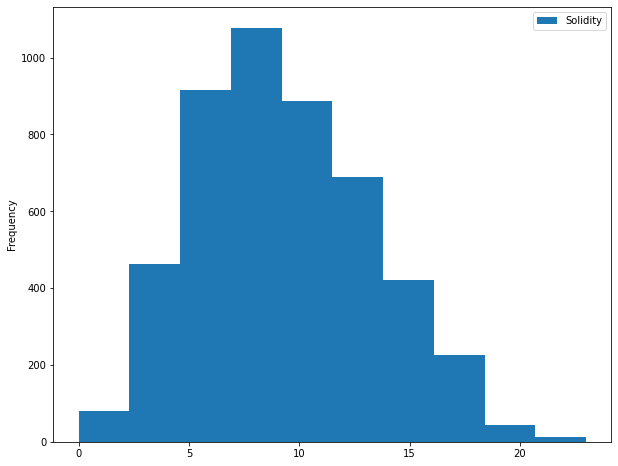

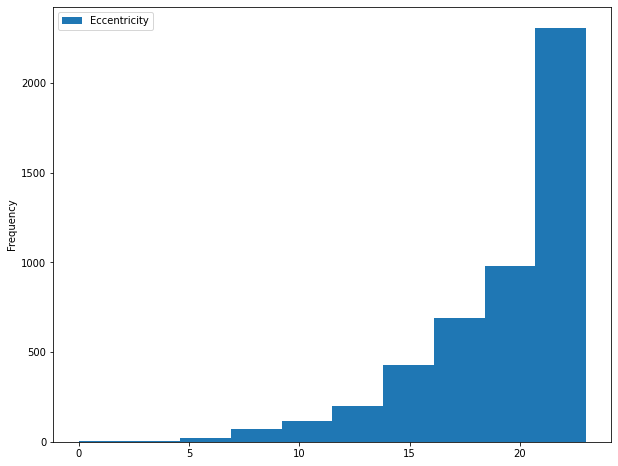

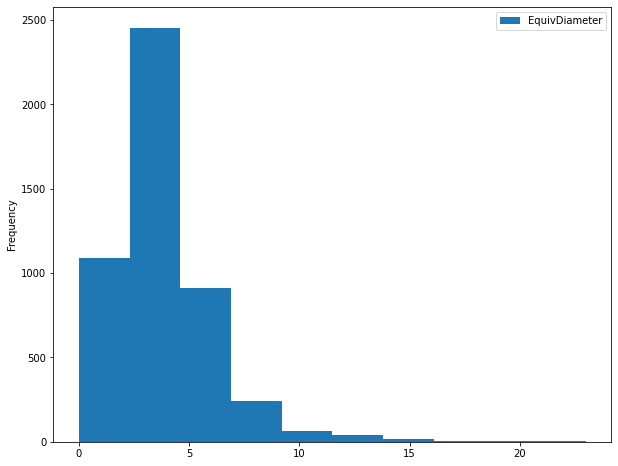

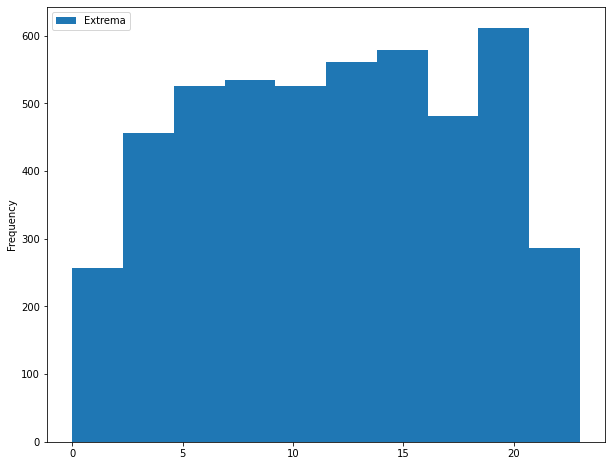

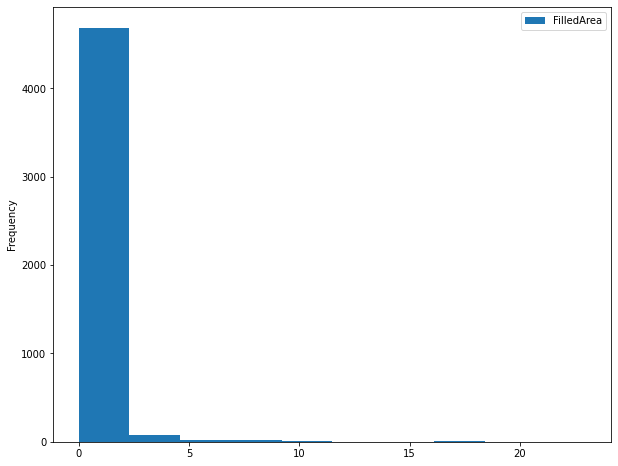

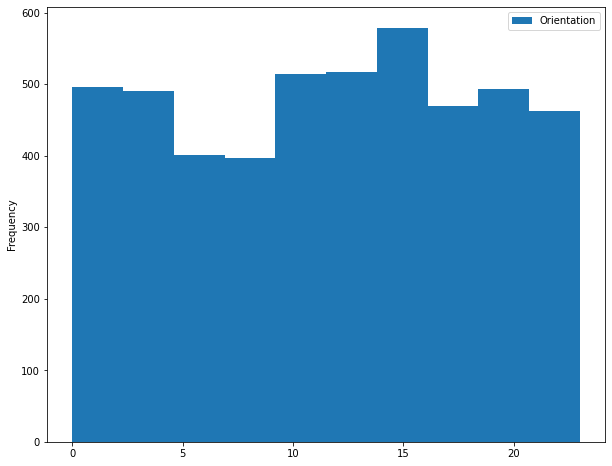

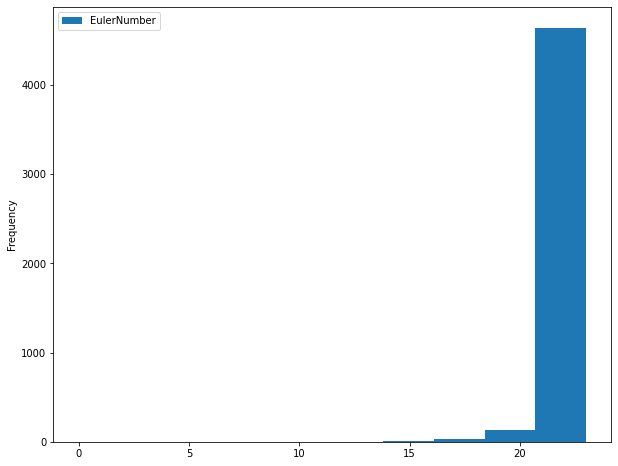

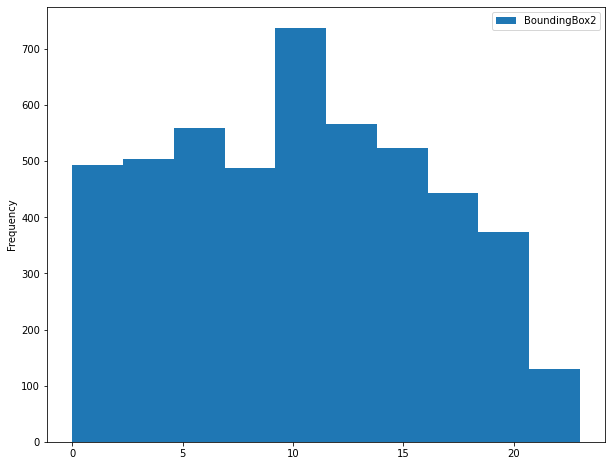

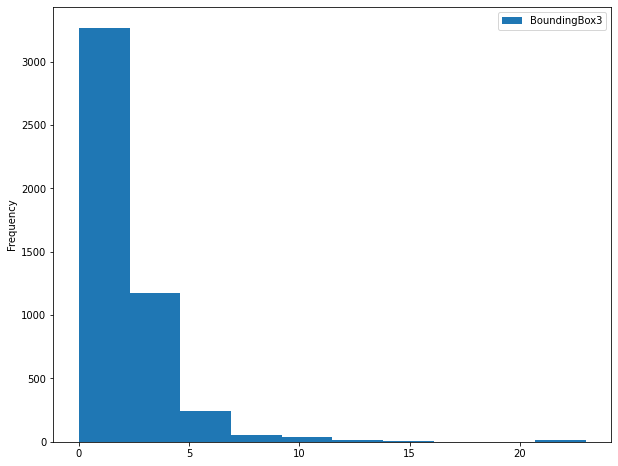

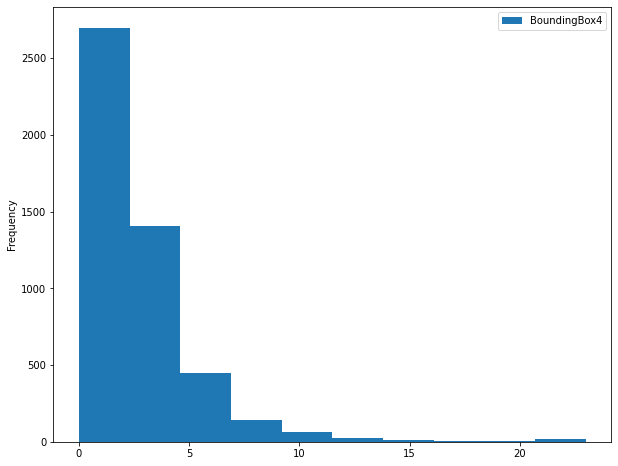

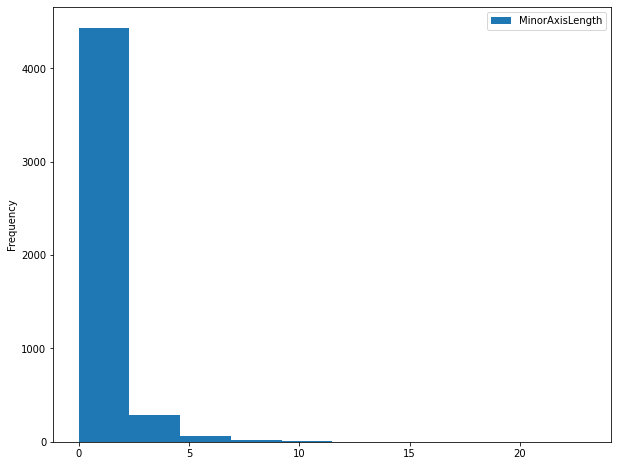

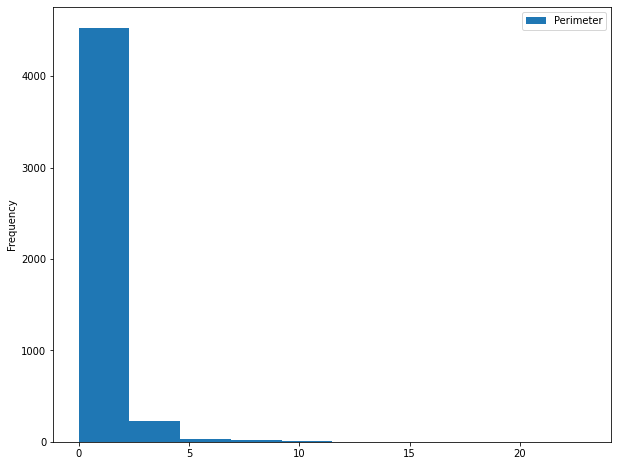

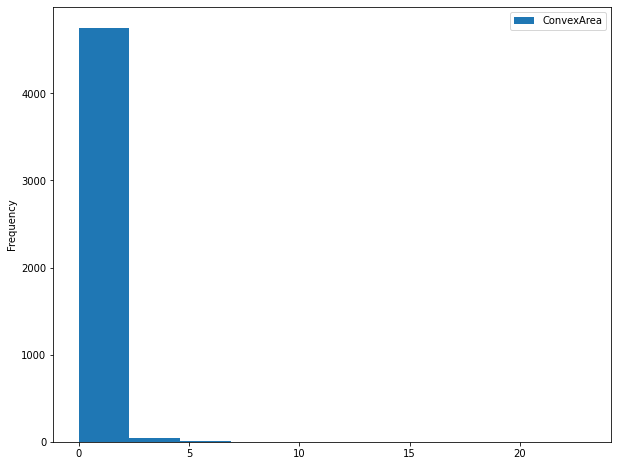

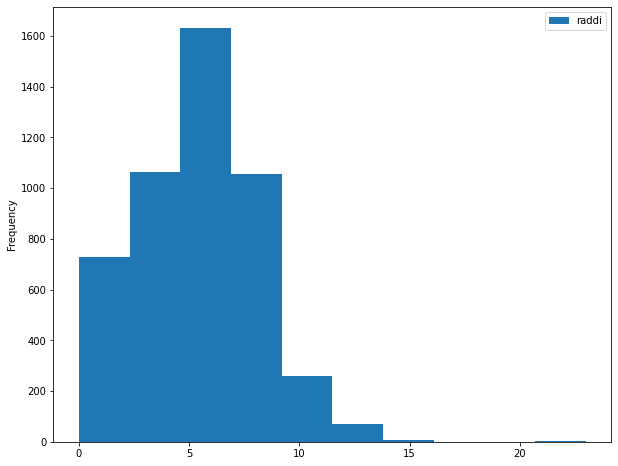

In [12]:
for col in data.columns[:-1]:
    ax = data.plot.hist(column=col,figsize=(10, 8))

<AxesSubplot:>

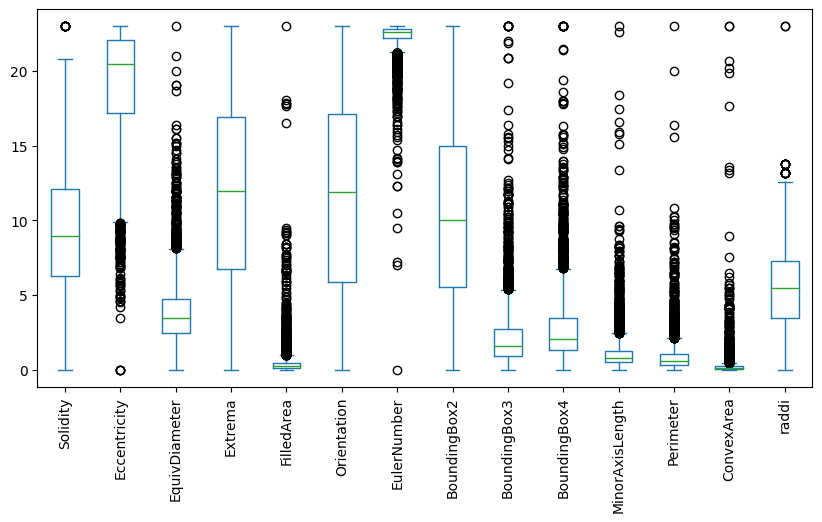

In [13]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
data.plot.box(rot = 90)

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for c in data.columns[:-1]:
    data = remove_outlier(data, c)
for c in val_data.columns[:-1]:
    val_data = remove_outlier(val_data, c)
len(data)

3503

<AxesSubplot:>

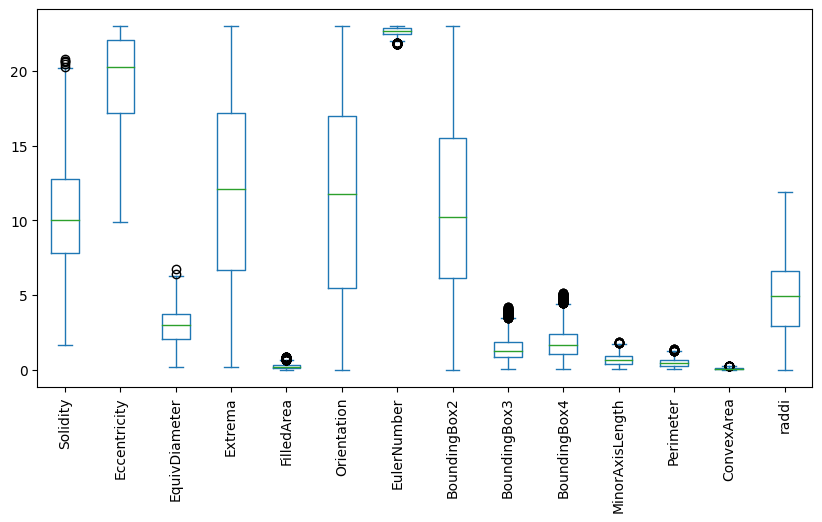

In [15]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
data.plot.box(rot = 90)

In [16]:
X = data.drop(['microorganisms'], axis=1)
y = data['microorganisms'].values

X_test = val_data.drop(['microorganisms'], axis=1)
y_test = val_data['microorganisms'].values

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_test = scalar.fit_transform(X_test)

<AxesSubplot:>

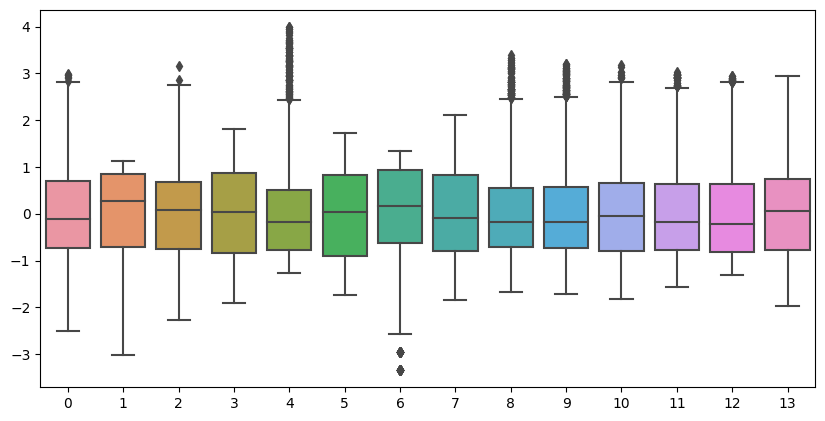

In [18]:
import seaborn as sns
sns.boxplot(data=X)

/home/genius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

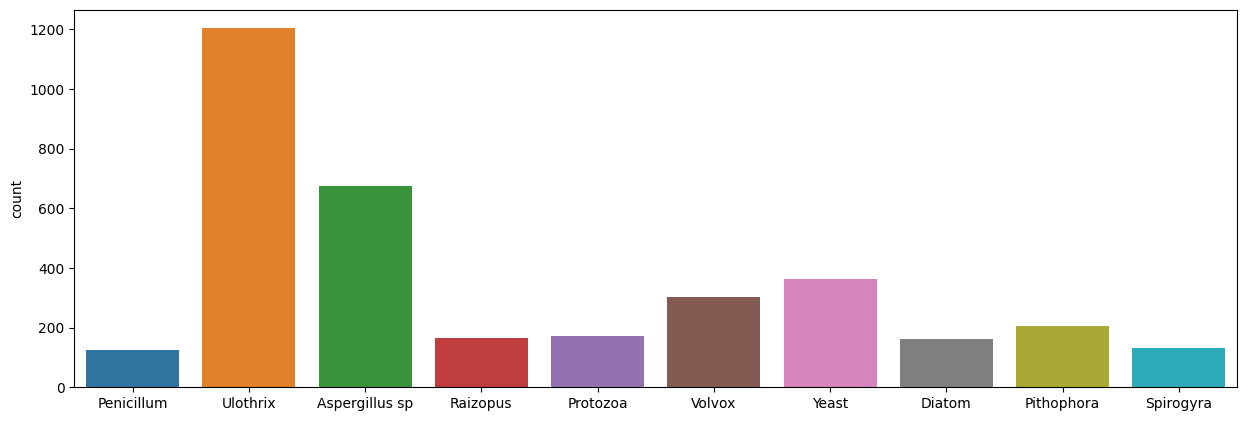

In [19]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y, label="count")

In [20]:
# Oversampling
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/home/genius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

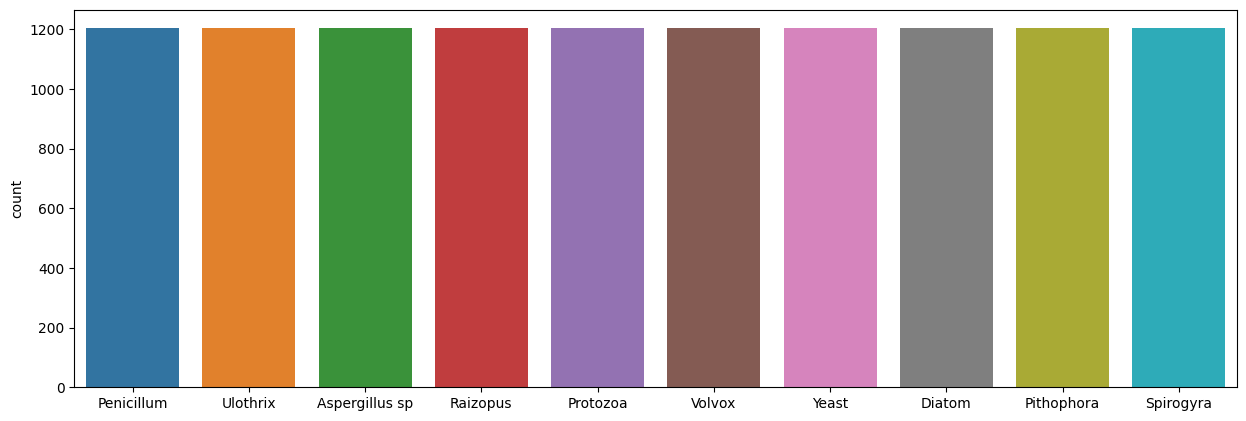

In [21]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y, label="count")

In [22]:
df = pd.DataFrame(X)
df['output'] = y
df = df.sample(frac = 1)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

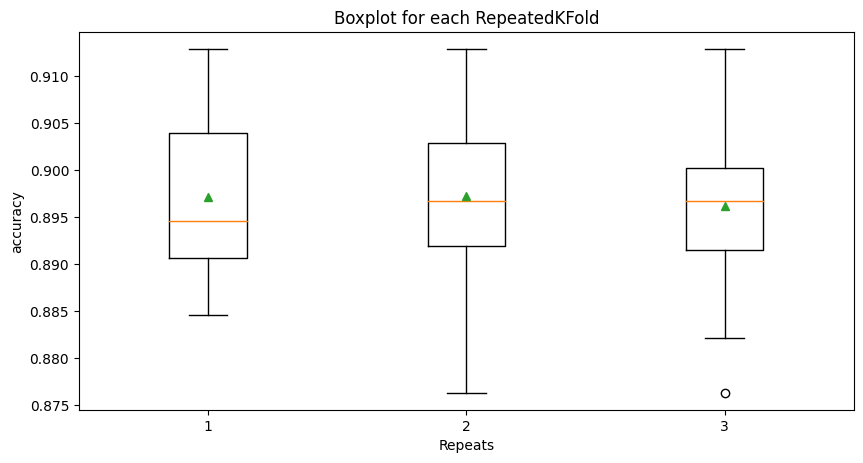

In [23]:
callModel(X, y)

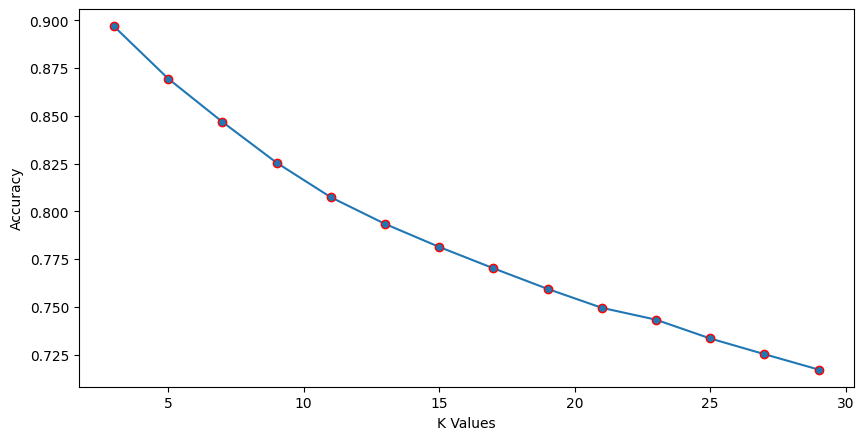

In [24]:
from scipy.stats import sem
import numpy as np
def evaluate_modelForPlot(X, y, repeats, k):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model1 = KNeighborsClassifier(k)
    # evaluate model
    scores = cross_val_score(model1, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModelForPlot(X, y):
    repeats = range(1,4)
    results = list()
    mean_res = list()
    k_vals = range(3,30, 2)
    for i in k_vals:
        for r in repeats:
        # evaluate using a given number of repeats
            scores = evaluate_modelForPlot(X, y, r, i)
        # store
            results.append(np.mean(scores))
        mean_res.append(np.mean(results))
        results.clear()
    plt.plot(k_vals, mean_res, marker='o', mec='red')
    plt.xlabel('K Values')
    plt.ylabel('Accuracy')
    plt.show()
callModelForPlot(X, y)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score

model.fit(X, y)
y_pred = model.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Aspergillus sp,Diatom,Penicillum,Pithophora,Protozoa,Raizopus,Spirogyra,Ulothrix,Volvox,Yeast,All
True,,,,,,,,,,,
Aspergillus sp,379,6,12,8,10,4,4,7,5,1,436
Diatom,0,110,0,1,0,0,0,0,0,0,111
Penicillum,1,0,111,0,0,0,0,0,0,0,112
Pithophora,0,1,0,81,0,0,2,1,1,0,86
Protozoa,0,0,0,0,169,0,0,0,0,1,170
Raizopus,1,0,0,0,0,157,0,0,0,0,158
Spirogyra,1,2,0,3,1,1,36,2,0,2,48
Ulothrix,46,32,13,32,8,3,22,509,33,20,718
Volvox,1,1,2,0,0,0,0,0,252,4,260


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Aspergillus sp       0.88      0.87      0.88       436
        Diatom       0.72      0.99      0.83       111
    Penicillum       0.80      0.99      0.89       112
    Pithophora       0.65      0.94      0.77        86
      Protozoa       0.89      0.99      0.94       170
      Raizopus       0.95      0.99      0.97       158
     Spirogyra       0.56      0.75      0.64        48
      Ulothrix       0.98      0.71      0.82       718
        Volvox       0.86      0.97      0.91       260
         Yeast       0.90      0.98      0.94       263

      accuracy                           0.87      2362
     macro avg       0.82      0.92      0.86      2362
  weighted avg       0.89      0.87      0.87      2362

